In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
data = list()
with open('Real_Cutoffs.txt', 'r') as file:
    for line in file:
        data.append(line.strip("[]\n").split(','))
        
        
Number_of_Points = 51
labels = ['Time','V0_Write','CU_Pt','CU_V','BH_Pt','V0_Read','Emitted_Current','CU_Gun_Temp','Power_Read','BH_OC_Temp','CU_GUN_CHWR_Avg']
Data = pd.DataFrame(np.array(data).astype(float))
data = np.array(data).astype(float)
Data.columns = labels
offset = -1
Data['Sqrt_EC'] = Data.apply(lambda row: np.sqrt(row.Emitted_Current*1000 + offset), axis = 1)
Data['Time_Since_Start'] = Data.apply(lambda row: row.Time - Data.Time[0], axis = 1)
Data['EC_Mask'] = Data.Sqrt_EC.loc[(Data.V0_Write != Data.V0_Write[0]) & (Data.V0_Write != Data.V0_Write[Number_of_Points])]
BH_off_index = 0
for num, i in enumerate(Data.V0_Write):
    if i < Data.V0_Write[0]:
        BH_off_index = num
        break
Data['EC_Mask'] = Data.Sqrt_EC.loc[(Data.V0_Write != Data.V0_Write[0]) & (Data.V0_Write != Data.V0_Write[Number_of_Points]) \
                                   & (Data.V0_Write != Data.V0_Write[BH_off_index]) & (Data.V0_Write != Data.V0_Write[BH_off_index + Number_of_Points])]
print(Data.V0_Write[0], Data.V0_Write[Number_of_Points], Data.V0_Write[BH_off_index], Data.V0_Write[BH_off_index+Number_of_Points])
Data.head()

5.0 6.0 4.25 5.0


Time  V0_Write     CU_Pt        CU_V     BH_Pt   V0_Read  \
0  1.602680e+09  5.000000  5.784588  110.040543  1.124110  5.669644   
1  1.602680e+09  5.020408  5.781409  109.960022  1.111394  5.424889   
2  1.602680e+09  5.040816  5.781409  109.919777  1.124110  5.283285   
3  1.602680e+09  5.061224  5.778230  109.879555  1.105036  5.002824   
4  1.602680e+09  5.081633  5.778230  109.960022  1.117752  5.003740   

   Emitted_Current  CU_Gun_Temp  Power_Read  BH_OC_Temp  CU_GUN_CHWR_Avg  \
0         0.101936    47.912727    6.152219   38.326939         1.892809   
1         0.165413    47.909046    6.107477   38.324692         1.896540   
2         0.187386    47.903088    6.031605   38.322792         1.894231   
3         0.133674    47.898312    5.988722   38.321255         1.892090   
4        -0.444948    47.894398    5.943210   38.321468         1.890439   

     Sqrt_EC  Time_Since_Start    EC_Mask  
0  10.046685          0.000000        NaN  
1  12.822369          0.200794  12.822369  
2  13.652326          0.403092  13.652326  
3  11.518431          0.602908  11.518431  
4        NaN          0.802916        NaN

Text(0, 0.5, 'Emitted Current + offset')

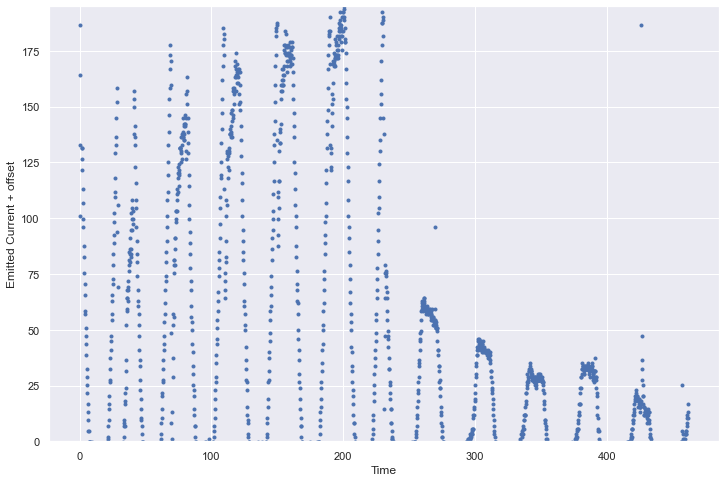

In [3]:
plt.figure(figsize = (12,8))
plt.scatter(Data.Time_Since_Start, \
            offset +  1000 * Data.Emitted_Current, label = 'Raw_Emitted_Current', marker = '.')
plt.ylim(0, max(offset +  1000 * Data.Emitted_Current))
plt.xlabel('Time')
plt.ylabel("Emitted Current + offset")

In [4]:
end_of_down_c1 = list()
end_of_up_c1 = list()
end_of_down_c2 = list()
end_of_up_c2 = list()
tf_swapper_1 = 0
tf_swapper_2 = 0
tf_swapper_3 = 0
tf_swapper_4 = 0
for num, i in enumerate(Data.V0_Write):
    if (i == Data.V0_Write[0]) & (num < BH_off_index):
        if tf_swapper_1 < 1:
            end_of_down_c1.append(num)
        tf_swapper_1 += 1
    else:
        if tf_swapper_1 > 1:
            end_of_down_c1.append(num-1)    
        tf_swapper_1 = 0
    if (i == Data.V0_Write[BH_off_index]) & (num > BH_off_index):
        if tf_swapper_2 < 1:
            end_of_down_c2.append(num)
        tf_swapper_2 += 1
    else:
        if tf_swapper_2 > 1:
            end_of_down_c2.append(num-1)  
        tf_swapper_2 = 0
    if (i == Data.V0_Write[Number_of_Points]) & (num < BH_off_index):
        if tf_swapper_3 < 1:
            end_of_up_c1.append(num)
        tf_swapper_3 += 1
    else:
        if tf_swapper_3 > 1:
            end_of_up_c1.append(num-1)  
        tf_swapper_3 = 0
    if (i == Data.V0_Write[BH_off_index + Number_of_Points]) & (num > BH_off_index):
        if tf_swapper_4 < 1:
            end_of_up_c2.append(num)
        tf_swapper_4 += 1
    else:
        if tf_swapper_4 > 1:
            end_of_up_c2.append(num-1)  
        tf_swapper_4 = 0
for i,j in zip(end_of_down_c1, end_of_up_c1):
    print(i,j)
end_of_down_c2.insert(0, end_of_down_c1[-1])
# end_of_up_c2.insert(0, end_of_up_c1[-1])

0 49
155 106
212 261
367 318
424 473
579 530
636 685
791 742
848 897
1003 954
1060 1109
1215 1166


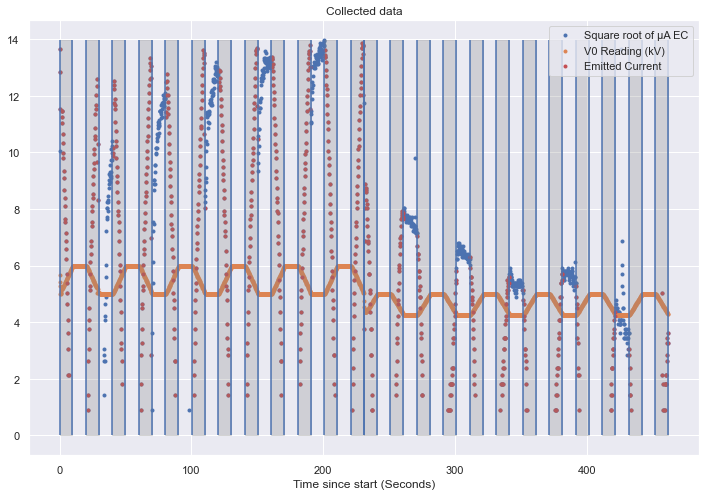

In [5]:
plt.figure(figsize = (12,8))
filter_1 = 0
filter_2 = -1
plt.scatter(Data.Time_Since_Start[filter_1:filter_2], Data.Sqrt_EC[filter_1:filter_2], label = 'Square root of \u03BCA EC', \
            marker = '.', color = sns.color_palette()[0])
plt.scatter(Data.Time_Since_Start[filter_1:filter_2], Data.V0_Read[filter_1:filter_2], label = 'V0 Reading (kV)', \
            marker = '.', color = sns.color_palette()[1])
plt.scatter(Data.Time_Since_Start[filter_1:filter_2], Data.EC_Mask[filter_1:filter_2], label = 'Emitted Current', \
            marker = '.', color = sns.color_palette()[3])
plt.xlabel('Time since start (Seconds)')
plt.title("Collected data")
thingy = 1
for index in [end_of_down_c1, end_of_down_c2, end_of_up_c1, end_of_up_c2]:
    plt.vlines(Data.Time_Since_Start[index], 0, max(Data.Sqrt_EC[filter_1:filter_2]))
#     if thingy % 2 == 0:
#         plt.subplots()[1].axvspan(Data.Time_Since_Start[index], Data.Time_Since_Start[index-1])#, alpha = 0.5, color = 'red')
#     thingy += 1
ROI_C2 = list()
ROI_C1 = list()
for down, up in zip(end_of_down_c1, end_of_up_c1):
    ROI_C1.append([down, up])
    plt.fill_betweenx([0,max(Data.Sqrt_EC[filter_1:filter_2])], \
                      Data.Time_Since_Start[down], Data.Time_Since_Start[up], \
                      color = 'gray', alpha = 0.25)
for down, up in zip(end_of_down_c2, end_of_up_c2):
    ROI_C2.append([down, up])
    plt.fill_betweenx([0,max(Data.Sqrt_EC[filter_1:filter_2])], \
                      Data.Time_Since_Start[up], Data.Time_Since_Start[down], \
                      color = 'gray', alpha = 0.25)
plt.legend()
plt.savefig('Figure_0.png', dpi = 120)
#plt.xlim(Data.Time_Since_Start[filter_1], Data.Time_Since_Start[filter_2])

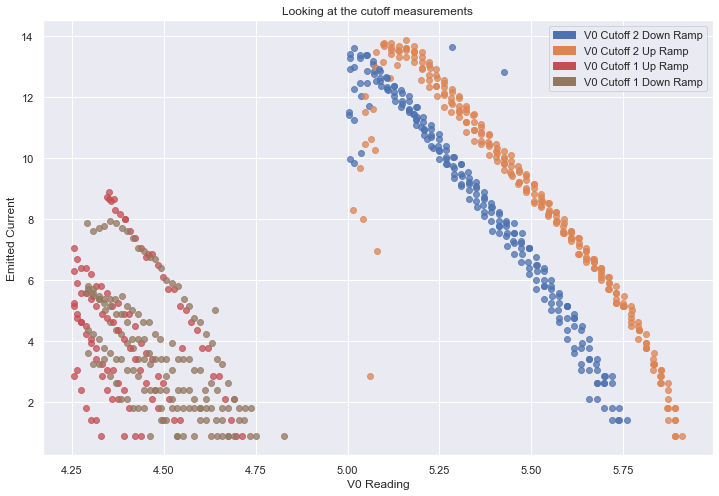

In [19]:
#plt.scatter(Data.V0_Read, Data.Emitted_Current)
BH_off_index = 0
for num, i in enumerate(Data.V0_Write):
    if i < Data.V0_Write[0]:
        BH_off_index = num
        break
        
plt.figure(figsize = (12,8))
for first, second in ROI_C1:
    if first > second:
        plt.scatter(Data.V0_Read[second:first], Data.EC_Mask[second:first], \
            alpha = 0.75, color = sns.color_palette()[1])
    plt.scatter(Data.V0_Read[first:second], Data.EC_Mask[first:second], \
            alpha = 0.75, color = sns.color_palette()[0])
for first, second in ROI_C2:
    if first > second:
        plt.scatter(Data.V0_Read[second:first], Data.EC_Mask[second:first], \
            alpha = 0.75, color = sns.color_palette()[5])
    plt.scatter(Data.V0_Read[first:second], Data.EC_Mask[first:second], \
            alpha = 0.75, color = sns.color_palette()[3])
plt.xlabel('V0 Reading')
plt.ylabel('Emitted Current')
plt.title("Looking at the cutoff measurements")

palette = dict(zip(['one', 'two', 'three', 'four'], \
                   [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[3], sns.color_palette()[5]]))
# Create legend handles manually
handles = [mpl.patches.Patch(color=palette[x], label=x) for x in palette.keys()]

plt.legend(handles = handles, labels = \
           ["V0 Cutoff 2 Down Ramp", 'V0 Cutoff 2 Up Ramp', 'V0 Cutoff 1 Up Ramp', 'V0 Cutoff 1 Down Ramp'])

plt.savefig("Figure_1.png", dpi = 120)

Implied cutoff: 5.82kV
Implied cutoff: 6.10kV
Implied cutoff: 5.85kV
Implied cutoff: 6.09kV
Implied cutoff: 5.86kV
Implied cutoff: 6.10kV
Implied cutoff: 5.88kV
Implied cutoff: 6.11kV
Implied cutoff: 5.89kV
Implied cutoff: 6.10kV
Implied cutoff: 5.89kV
Implied cutoff: 6.11kV
Average R² of 0.9912


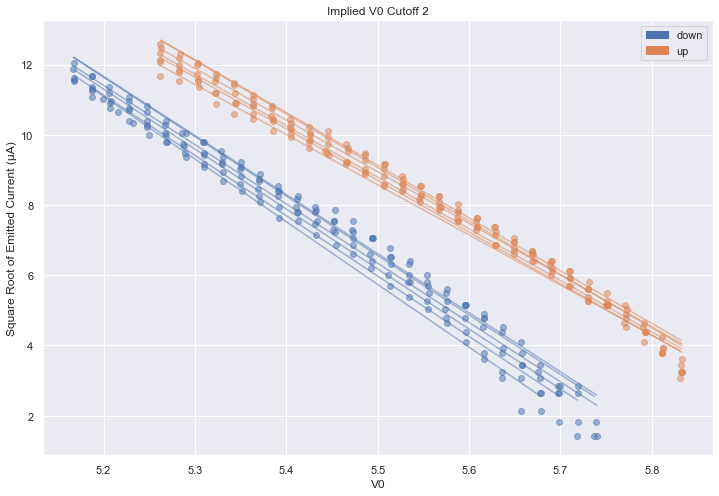

In [7]:
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
model = LinearRegression()

intercepts = list()
coefficients = list()
implied_cutoffs = list()
scores = []

i = 0

plt.figure(figsize = (12,8))
plt.title('Implied V0 Cutoff 2')
plt.xlabel('V0')
plt.ylabel('Square Root of Emitted Current (\u03BCA)')

offset_value = 10

for first, second in ROI_C1:
    i += 1
    color = sns.color_palette()[0] 
    if i % 2 == 0:
#         continue
        color = sns.color_palette()[1]
        pass
    
    if second < first:
        first, second = second, first
        
    model = LinearRegression()
    mask = [not x for x in np.isnan(Data.EC_Mask[first + offset_value:second - offset_value])]
    x = np.array(Data.V0_Read[first + offset_value:second - offset_value][mask]).reshape(-1,1)
    y = np.array(Data.EC_Mask[first + offset_value:second - offset_value][mask]).reshape(-1,1)
#     print(x.shape, y.shape)
    model.fit(x,y)
    scores.append(model.score(x,y))
    m, b = float(model.coef_), float(model.intercept_)
    coefficients.append(m)
    intercepts.append(b)
    implied_cutoffs.append(-b/m)
    print("Implied cutoff: {:.2f}kV".format(-b/m))
    xnums = np.linspace(min(x), max(x), 50)
    ynums = m*xnums + b
    plt.plot(xnums, ynums, color = color, alpha = 0.5)
    plt.scatter(Data.V0_Read[first + offset_value:second - offset_value],\
                Data.EC_Mask[first + offset_value:second - offset_value], \
                color = color, alpha = 0.5)
    

palette = dict(zip(['one', 'two'], [sns.color_palette()[0], sns.color_palette()[1]]))
# Create legend handles manually
handles = [mpl.patches.Patch(color=palette[x], label=x) for x in palette.keys()]

plt.legend(handles = handles, labels = ["down", 'up'])
    
BH_Off_Time = Data.Time_Since_Start[second]
#print(BH_Off_Time)
print('Average R\u00b2 of {:.4f}'.format(sum(scores)/len(scores)))
Average_V0_Cutoff_2_Score = sum(scores)/len(scores)
plt.savefig("Figure_2.png", dpi = 120)

Implied cutoff: 4.78kV; R²: 0.9834
Implied cutoff: 4.84kV; R²: 0.9692
Implied cutoff: 4.63kV; R²: 0.9687
Implied cutoff: 4.78kV; R²: 0.9125
Implied cutoff: 4.59kV; R²: 0.9754
Implied cutoff: 4.88kV; R²: 0.9657
Implied cutoff: 4.48kV; R²: 0.9375
Implied cutoff: 4.73kV; R²: 0.9782
Implied cutoff: 4.43kV; R²: 0.9565
Implied cutoff: 4.62kV; R²: 0.9406
Implied cutoff: 4.38kV; R²: 0.8813
Implied cutoff: 2.81kV; R²: 0.0132


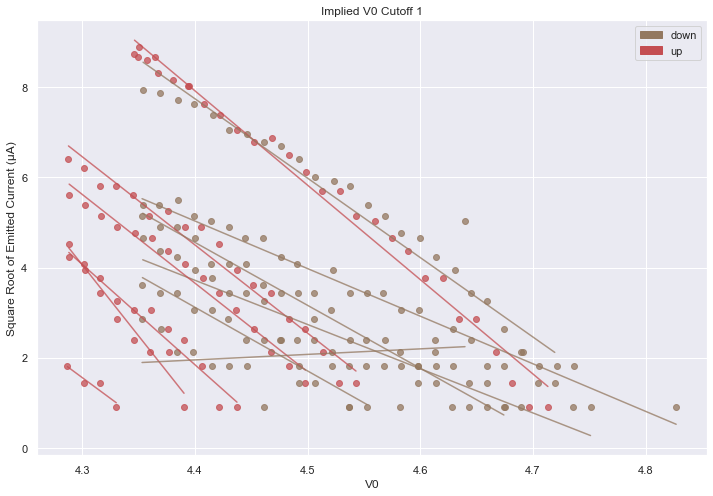

In [8]:
intercepts_2 = list()
coefficients_2 = list()
implied_cutoffs_2 = list()
times = list()
scores = list()

plt.figure(figsize = (12,8))
plt.title('Implied V0 Cutoff 1')
plt.xlabel('V0')
plt.ylabel('Square Root of Emitted Current (\u03BCA)')

offset_value = 4
for first, second in ROI_C2:
    color = sns.color_palette()[3]
    if second < first:
        first, second = second, first
        times.append(Data.Time_Since_Start[second] - BH_Off_Time)
        color = sns.color_palette()[5]
    else:
        times.append(Data.Time_Since_Start[first] - BH_Off_Time)
        
    model = LinearRegression()
    mask = [not x for x in np.isnan(Data.EC_Mask[first + offset_value:second - offset_value])]
    x = np.array(Data.V0_Read[first + offset_value:second - offset_value][mask]).reshape(-1,1)
    y = np.array(Data.EC_Mask[first + offset_value:second - offset_value][mask]).reshape(-1,1)
#     print(x.shape, y.shape)
    model.fit(x,y)
    score = model.score(x,y)
    scores.append(score)
    m, b = float(model.coef_), float(model.intercept_)
    coefficients_2.append(m)
    intercepts_2.append(b)
    implied_cutoffs_2.append(-b/m)
    print("Implied cutoff: {:.2f}kV; R\u00b2: {:.4f}".format(-b/m, score))
    xnums = np.linspace(min(x), max(x), 50)
    ynums = m*xnums + b
    plt.plot(xnums, ynums, color = color, alpha = 0.75)
    plt.scatter(Data.V0_Read[first + offset_value:second - offset_value],\
                Data.EC_Mask[first + offset_value:second - offset_value], \
                color = color, alpha = 0.75)
palette = dict(zip(['one', 'two'], [sns.color_palette()[5], sns.color_palette()[3]]))
# Create legend handles manually
handles = [mpl.patches.Patch(color=palette[x], label=x) for x in palette.keys()]

plt.legend(handles = handles, labels = ["down", 'up'])
#print(times)
plt.savefig('Figure_3.png', dpi = 120)

Implied V0 Cutoff 1 from down ramp at t=0 is 4.90 kV
Implied V0 Cutoff 1 from up ramp at t=0 is 4.74 kV


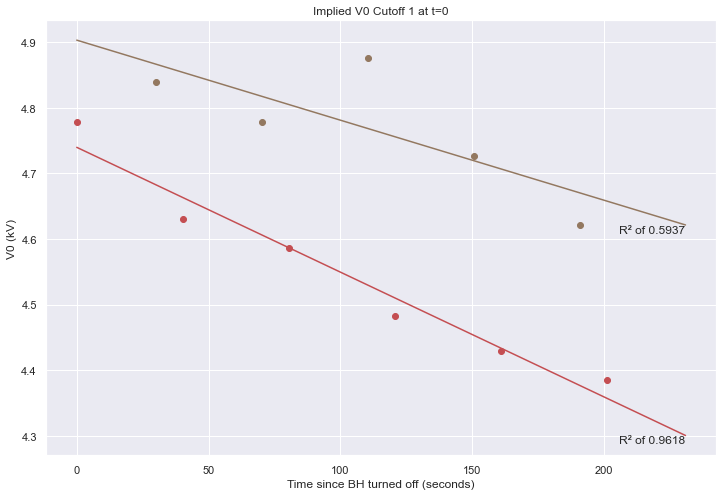

In [9]:
plt.figure(figsize = (12,8))
plt.title('Implied V0 Cutoff 1 at t=0')
plt.xlabel('Time since BH turned off (seconds)')
plt.ylabel('V0 (kV)')


model = LinearRegression()
model_2 = LinearRegression()
# times.pop()
# implied_cutoffs_2.pop()
Up = True
Down = True

if Up:
    times_mask = times[1::2]
    implied_cutoffs_2_mask = implied_cutoffs_2[1::2]
    times_mask.pop()
    implied_cutoffs_2_mask.pop()
    
if Down:
    times_mask_2 = times[::2]
    implied_cutoffs_2_mask_2 = implied_cutoffs_2[::2]

plt.scatter(times_mask, implied_cutoffs_2_mask, color = sns.color_palette()[5])
model.fit(np.array(times_mask).reshape(-1,1), implied_cutoffs_2_mask)
m,b = model.coef_, model.intercept_
model_score = model.score(np.array(times_mask).reshape(-1,1), implied_cutoffs_2_mask)
xnums = np.linspace(0,max(times), 100)
ynums = m*xnums + b
plt.plot(xnums, ynums, color = sns.color_palette()[5])
plt.annotate(text = "R\u00b2 of {:.4f}".format(model_score), xy= [xnums[-1],ynums[-1]], ha = 'right', va = 'top')
print("Implied V0 Cutoff 1 from down ramp at t=0 is {:.2f} kV".format(b))
plt.scatter(times_mask_2, implied_cutoffs_2_mask_2, color = sns.color_palette()[3])
model_2.fit(np.array(times_mask_2).reshape(-1,1), implied_cutoffs_2_mask_2)
m_2,b_2 = model_2.coef_, model_2.intercept_
model_2_score = model_2.score(np.array(times_mask_2).reshape(-1,1), implied_cutoffs_2_mask_2)
xnums_2 = np.linspace(0,max(times), 100)
ynums_2 = m_2*xnums_2 + b_2
plt.plot(xnums_2, ynums_2, color = sns.color_palette()[3])
plt.annotate(text = "R\u00b2 of {:.4f}".format(model_2_score), xy= [xnums_2[-1],ynums_2[-1]], ha = 'right', va = 'top')
print("Implied V0 Cutoff 1 from up ramp at t=0 is {:.2f} kV".format(b_2))
implied_c1_down = b
implied_c1_up = b_2
plt.savefig("Figure_4.png", dpi = 120)

In [10]:
print("Implied cutoff 2 from average up ramp is {:.2f}kV".format(sum(implied_cutoffs[::2])/len(implied_cutoffs[::2])))
implied_c2_up = sum(implied_cutoffs[::2])/len(implied_cutoffs[::2])
print("Implied cutoff 2 from average down ramp is {:.2f}kV".format(sum(implied_cutoffs[1::2])/len(implied_cutoffs[1::2])))
implied_c2_down = sum(implied_cutoffs[1::2])/len(implied_cutoffs[1::2])

Implied cutoff 2 from average up ramp is 5.86kV
Implied cutoff 2 from average down ramp is 6.10kV


In [11]:
import time
start_time = time.time()
from fpdf import FPDF
pdf = FPDF()
pdf.add_page()
pdf.set_xy(5, 5)
pdf.set_font('arial', 'B', 8)
pdf.cell(60)
pdf.cell(75, 10, "Automated Cutoff Data taken {} Report".format(201010), 0, 2, "C")
#pdf.cell(90, 10, " ", 0, 2, 'L')
pdf.cell(-40)
pdf.cell(75,10, "Implied V0 cutoff 1 at time t=0 for down ramp: {:.2f}kV".format(implied_c1_down), 0, 2, 'L')
pdf.cell(75,10, "Implied V0 cutoff 1 at time t=0 for up ramp: {:.2f}kV".format(implied_c1_up), 0, 2, 'L')
pdf.cell(75,10, "Implied V0 cutoff 2 for down ramp: {:.2f}kV".format(implied_c2_down), 0, 2, 'L')
pdf.cell(75,10, "Implied V0 cutoff 2 for up ramp: {:.2f}kV".format(implied_c2_up), 0, 2, 'L')
pdf.cell(75,10, "How we got these results", 0, 2, 'L')
pdf.cell(75,10, "Here is the data that we're working with", 0, 2, 'L')
pdf.image('Figure_0.png', x = None, y = None, w = 180, h = 0, type = '', link = '')
pdf.add_page()
pdf.set_font('arial', 'B', 8)
pdf.cell(15)
pdf.cell(75,10, "Looking at our cutoff 1 and 2", 0, 2, 'L')
pdf.image('Figure_1.png', x = None, y = None, w = 180, h = 0, type = '', link = '')
pdf.add_page()
pdf.set_font('arial', 'B', 8)
pdf.cell(15)
for num, value in enumerate(implied_cutoffs):
    if num % 2 == 0:
        pdf.cell(75,10, "Implied V0 Cutoff on up swing of V0: {:.2f}kV with a confidence of {:.4f}".format(value, scores[num]), \
                 0, 2, 'L')
    else:
        pdf.cell(75,10, "Implied V0 Cutoff on down swing of V0: {:.2f}kV with a confidence of {:.4f}".format(value, scores[num]), \
                 0, 2, 'L')
pdf.image('Figure_2.png', x = None, y = None, w = 180, h = 0, type = '', link = '')
pdf.add_page()
pdf.set_font('arial', 'B', 8)
pdf.cell(15)
for num, value in enumerate(implied_cutoffs_2):
    if num % 2 == 0:
        pdf.cell(75,10, "Implied V0 Cutoff on up swing of V0: {:.2f}kV with a confidence of {:.4f}".format(value, scores[num]), \
                 0, 2, 'L')
    else:
        pdf.cell(75,10, "Implied V0 Cutoff on down swing of V0: {:.2f}kV with a confidence of {:.4f}".format(value, scores[num]), \
                 0, 2, 'L')
pdf.image('Figure_3.png', x = None, y = None, w = 180, h = 0, type = '', link = '')
pdf.add_page()
pdf.set_font('arial', 'B', 8)
pdf.cell(15)
pdf.cell(75,10, "Extrapolating back to moment when BH was turned off", 0, 2, 'L')
pdf.cell(75,10, "Implied V0 cutoff 1 at time t=0 for down ramp: {:.2f}kV".format(implied_c1_down), 0, 2, 'L')
pdf.cell(75,10, "Implied V0 cutoff 1 at time t=0 for up ramp: {:.2f}kV".format(implied_c1_up), 0, 2, 'L')
pdf.image('Figure_4.png', x = None, y = None, w = 180, h = 0, type = '', link = '')

pdf.output('test.pdf', 'F')
print(time.time() - start_time)

20.6911780834198
